<a href="https://colab.research.google.com/github/Vraj1103/sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflict

In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install mlxtend
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-xn_hikj4
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-xn_hikj4
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7602 sha256=78a7d588d6b122d80ccd314c9ace76ed5e7b5a93fdb1a822fb0ef79cb75a2e15
  Stored in directory: /tmp/pip-ephem-wheel-cache-8s4luhtf/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


##sentiment analysis with the pipeline


In [3]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

data = ['i love you','i hate you']

sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

##Data loading and pre-processing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/IMDB-Dataset.csv")
df = df.sample(10_000)
df.head()

,review,sentiment
17556,"Spoilers ahead, but does it really matter? Hav...",negative
4581,"Easily one of my favourite dramatic TV films, ...",positive
23943,This movie was horrid and at the end made me w...,negative
6671,"While watching the film, I'm not sure what dir...",negative
15721,This isn't exactly a complicated story. It's n...,negative


In [6]:
df.shape
df.isnull().sum()

review       0
sentiment    0
dtype: int64

###Pre-processing

In [7]:
df['word_count']=df['review'].apply(lambda x: ps.get_wordcounts(x))
df['char_counts']=df['review'].apply(lambda x: ps.get_charcounts(x))
df['avg_wordlength']=df['review'].apply(lambda x: ps.get_avg_wordlength(x))
df['stopwords_counts']=df['review'].apply(lambda x: ps.get_stopwords_counts(x))

In [8]:
df.head()
df['review'] = df['review'].str.lower()
df['review'] = df['review'].apply(lambda x: ps.remove_html_tags(x))

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


<Axes: >

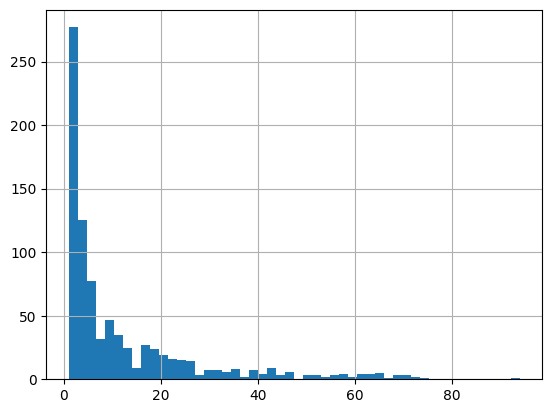

In [9]:
df['word_count'].value_counts().hist(bins=50)

##Data Preparation for ML

In [10]:
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

In [11]:
class CustomDataset(Dataset):
  def __init__(self,texts,labels,tokenizer,max_len=512):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self,idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text,truncation=True,padding = "max_length",max_length=self.max_len)

    return{
        'input_ids':encoding['input_ids'],
        'attention_mask':encoding['attention_mask'],
        'labels':label
    }



###Prepare tokenizer and model

In [12]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = 'distilbert-base-uncased'
device = "cuda"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=2).to(device)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
X = df['review'].tolist()

label2id = {'positive':1,'negative':0}
id2label = {1:'positive',0:'negative'}

y = df['sentiment'].map(label2id).tolist()

dataset = CustomDataset(X,y,tokenizer)

In [ ]:
train_dataset,test_dataset = train_test_split(dataset,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
def compute_metrics(example):
  labels = example.label_ids
  preds = example.prediction.argmax(-1)

  f1 = f1_score(labels,preds,average = "weighted")
  acc = accuracy_score(labels,preds)

  return {'accuracy':acc,"f1":f1}

In [19]:
from transformers import Trainer,TrainingArguments
batch_size = 16
model_name = "distilbert_finetuned_sentiment"

args = TrainingArguments(
    output_dir = "output",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size = batch_size,
    learning_rate = 2e-5,
    num_train_epochs = 1,
    evaluation_strategy = "epoch"
)


In [20]:
trainer = Trainer(model = model,args=args,train_dataset = train_dataset,eval_dataset = test_dataset,compute_metrics=compute_metrics,tokenizer = tokenizer)

In [25]:
trainer.train()

Epoch,Training Loss,Validation Loss


Checkpoint destination directory output/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.


Epoch,Training Loss,Validation Loss


AttributeError: 'EvalPrediction' object has no attribute 'prediction'

In [26]:
trainer.save_model(model_name)

##Model Testing

In [41]:
text = "dude was fucking hot"
pipe = pipeline('text-classification',model_name)
pipe(text)

[{'label': 'LABEL_0', 'score': 0.7562693953514099}]

In [38]:

id2label

{1: 'positive', 0: 'negative'}